In [14]:
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2, os
import pandas as pd

In [15]:
os.listdir('train')

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [16]:
example_image = mpimg.imread('train/angry/im0.png')

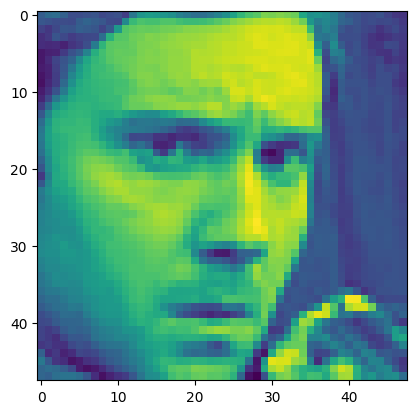

In [17]:
plt.imshow(example_image)

In [18]:
data = {
    'angry': 0,
    'disgusted': 1,
    'fearful': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprised': 6
}

In [237]:
IMG_SIZE = 48
X_train, y_train, X_test, y_test = [], [], [], []


# Train
for folder in os.listdir('train/'):
    folder_path = os.path.join('train/', folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path) and file_path.lower().endswith(('.jpg', '.png')):
            # read grayscale directly
            image = mpimg.imread(file_path)
            if len(image.shape) == 3:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            image = image.reshape(IMG_SIZE, IMG_SIZE, 1)
            X_train.append(image)
            y_train.append(data[folder])

for folder in os.listdir('test/'):
    folder_path = os.path.join('test/', folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path) and file_path.lower().endswith(('.jpg', '.png')):
            # read grayscale directly
            image = mpimg.imread(file_path)
            if len(image.shape) == 3:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            image = image.reshape(IMG_SIZE, IMG_SIZE, 1)
            X_test.append(image)
            y_test.append(data[folder])
            
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [238]:
from keras.utils import to_categorical

In [239]:
y_train = to_categorical(y_train, num_classes=7)

In [240]:
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings

In [241]:
print(X_train.shape)

(28709, 48, 48, 1)


In [242]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.add(Dropout(0.5))
model.summary()

C:\Users\emeks\Desktop\kaggle_noetbooks\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 7)                   │             231 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 7)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,169,799 (8.28 MB)

 Trainable params: 2,169,799 (8.28 MB)

 Non-trainable params: 0 (0.00 B)

In [243]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [244]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [245]:
model.fit(X_train, y_train, validation_split=0.15, epochs=50)

Epoch 1/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1804 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.8852
Epoch 2/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.1883 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.8373
Epoch 3/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.1953 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.8215
Epoch 4/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.1971 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.8147
Epoch 5/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2016 - loss: nan - val_accuracy: 0.2417 - val_loss: 1.7808
Epoch 6/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2013 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.7871
Epoch 7/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2008 - loss: nan - val_accuracy: 0.2415 - val_loss: 1.7576
Epoch 8/50
763/763 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2054 - loss: nan - val_accuracy: 0.2419 - v

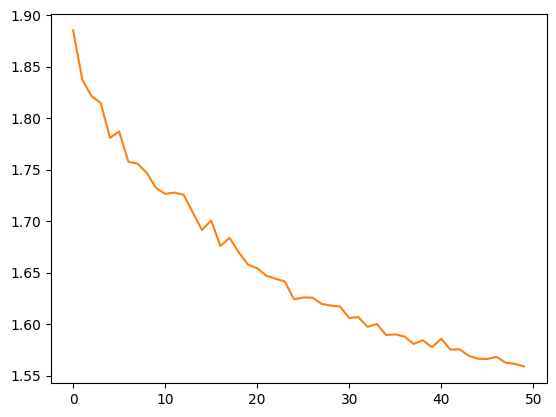

In [254]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [253]:
X_train

array([[[[0.14117648],
         [0.18431373],
         [0.10588235],
         ...,
         [0.14117648],
         [0.13725491],
         [0.14901961]],

        [[0.15686275],
         [0.16862746],
         [0.10588235],
         ...,
         [0.19607843],
         [0.17254902],
         [0.15294118]],

        [[0.15294118],
         [0.1254902 ],
         [0.13725491],
         ...,
         [0.12156863],
         [0.11764706],
         [0.09803922]],

        ...,

        [[0.22745098],
         [0.2509804 ],
         [0.18431373],
         ...,
         [0.03137255],
         [0.24313726],
         [0.4392157 ]],

        [[0.27450982],
         [0.27058825],
         [0.18431373],
         ...,
         [0.17254902],
         [0.02745098],
         [0.11372549]],

        [[0.29411766],
         [0.27450982],
         [0.19215687],
         ...,
         [0.3372549 ],
         [0.07058824],
         [0.05490196]]],


       [[[0.23529412],
         [0.18431373],
         [0.12

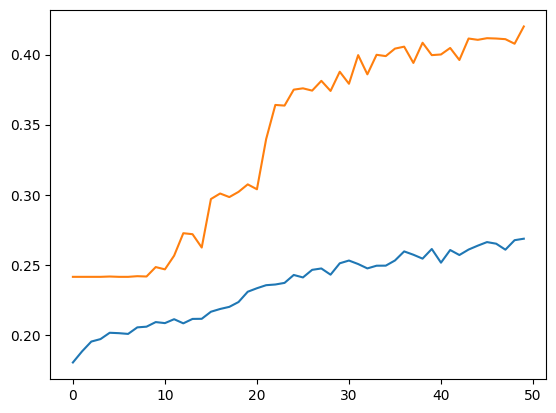

In [247]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [248]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [249]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [250]:
acc = accuracy_score(y_test, y_pred_classes)
mae = mean_absolute_error(y_test, y_pred_classes)

In [251]:
print(f'Accuracy: {acc}')
print(f'mean absolute error: {mae}')

Accuracy: 0.42672053496795764
mean absolute error: 1.3852047924212874


In [ ]:
Accuracy: 0.41850097520200613
mean absolute error: 1.4937308442463082

In [ ]:
import pickle 

with open('model.pkl', '')
